---
title: Interactive comparison of different model segmentation results   
author: Yifei Duan, Yifan Duan  
date: 2024-10-02
---

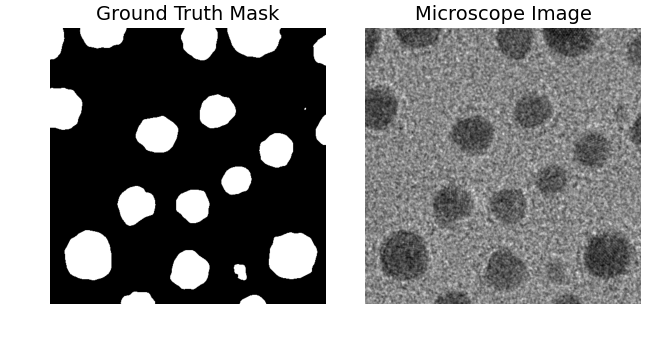

In [1]:
#| label: app:fig5

%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
import numpy as np

# # Image and label file paths
image_paths = [
    "mask/microscope_image.png",
    "mask/ground_truth_mask.png",
    "mask/mask_EfficientSAM_colored.png",
    "mask/mask_yolo_v8.png",
    "mask/mask_Swin_UNet.png",
    "mask/mask_vmamba.png",
]

# Labels
image_labels = [
    "Microscope Image",
    "Ground Truth Mask",
    "EfficientSAM Mask",
    "YOLO v8 Mask",
    "Swin UNet Mask",
    "Vmamba Mask",
]


# Indices for grayscale
gray_image_indices = [1, 4, 5]  # Ground Truth Mask, Swin UNet Mask, and Vmamba Mask

# # Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.7, 3.5), gridspec_kw={'width_ratios': [1, 1]}, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.01, hspace=0)  # Adjust the spacing

# reduce whitespace
fig.tight_layout(pad=1.3)

fig.canvas.resizable = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig.canvas.toolbar_visible = True
fig.canvas.layout.width = '670px'
fig.canvas.layout.height = "360px"
fig.canvas.toolbar_position = 'bottom'

# Read the initial image
gt_image = mpimg.imread(image_paths[1])  # Ground Truth Mask
if 1 in gray_image_indices:
    if len(gt_image.shape) == 3 and gt_image.shape[2] == 3:
        gt_image = np.dot(gt_image[..., :3], [0.2989, 0.5870, 0.1140])
gt_img_display = ax1.imshow(gt_image, cmap='gray')  # display in grayscale
ax1.axis('off')  # Turn off the axis
ax1.set_title('Ground Truth Mask', fontsize=14)

# Initially display the first image
initial_image = mpimg.imread(image_paths[0])
right_img_display = ax2.imshow(initial_image)  # # Display in color
ax2.axis('off')
right_title = ax2.set_title(image_labels[0], fontsize=14)

# The update function
def update_image(button_index):
    img = mpimg.imread(image_paths[button_index])  # Read the new image
    if button_index in gray_image_indices:
        # Check if the image is three-channel
        if len(img.shape) == 3 and img.shape[2] == 3:
            img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])  # Convert RGB to grayscale
        right_img_display.set_data(img)  # Update right image
        right_img_display.set_cmap('gray')  # Set color mapping to grayscale
    else:
        right_img_display.set_data(img)  # Directly display color images
        right_img_display.set_cmap(None)  # Reset color mapping
    right_title.set_text(image_labels[button_index])  # Update right title
    fig.canvas.draw_idle()  # Redraw the canvas

# buttons
buttons = []
for i, label in enumerate(image_labels):
    button = widgets.Button(description=label)
    button.on_click(lambda b, idx=i: update_image(idx))  # Bind click events to each button
    buttons.append(button)

# Display buttons and image
button_box = widgets.HBox(buttons)
display(button_box)